In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'wd':[]}

In [4]:
g = 4
lr = 1.0e-5
weight_decay = [0.1, 0.01]

for wd in weight_decay:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}, weight decay {wd}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=wd,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search roberta-large, learning rate 1e-05, focal loss gamma 4, weight decay 0.1


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0481	Val Loss:	0.6484	Accuracy:	0.7834	F1:	0.7180
2 / 30: Train Loss:	0.0359	Val Loss:	0.6188	Accuracy:	0.7352	F1:	0.7119
3 / 30: Train Loss:	0.0274	Val Loss:	0.5241	Accuracy:	0.7790	F1:	0.7539
4 / 30: Train Loss:	0.0227	Val Loss:	0.4997	Accuracy:	0.8621	F1:	0.8234
5 / 30: Train Loss:	0.0136	Val Loss:	0.3947	Accuracy:	0.8512	F1:	0.8099
6 / 30: Train Loss:	0.0107	Val Loss:	0.4123	Accuracy:	0.8446	F1:	0.8105
7 / 30: Train Loss:	0.0103	Val Loss:	0.3486	Accuracy:	0.8665	F1:	0.8357
8 / 30: Train Loss:	0.0081	Val Loss:	0.4356	Accuracy:	0.8053	F1:	0.7803
9 / 30: Train Loss:	0.0077	Val Loss:	0.3800	Accuracy:	0.8818	F1:	0.8483
10 / 30: Train Loss:	0.0087	Val Loss:	0.3979	Accuracy:	0.8950	F1:	0.8598
11 / 30: Train Loss:	0.0078	Val Loss:	0.3042	Accuracy:	0.8753	F1:	0.8376
12 / 30: Train Loss:	0.0075	Val Loss:	0.3063	Accuracy:	0.8775	F1:	0.8324
13 / 30: Train Loss:	0.0015	Val Loss:	0.2971	Accuracy:	0.8709	F1:	0.8271
No improvement for 3 epochs. Stopping early.
best (higgest m

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.0480	Val Loss:	0.6413	Accuracy:	0.7943	F1:	0.7285
2 / 30: Train Loss:	0.0364	Val Loss:	0.6047	Accuracy:	0.7987	F1:	0.7693
3 / 30: Train Loss:	0.0278	Val Loss:	0.5171	Accuracy:	0.8140	F1:	0.7780
4 / 30: Train Loss:	0.0196	Val Loss:	0.4304	Accuracy:	0.8709	F1:	0.8206
5 / 30: Train Loss:	0.0146	Val Loss:	0.4108	Accuracy:	0.8271	F1:	0.7079
6 / 30: Train Loss:	0.0194	Val Loss:	0.4647	Accuracy:	0.8162	F1:	0.7863
7 / 30: Train Loss:	0.0091	Val Loss:	0.3576	Accuracy:	0.8753	F1:	0.8310
8 / 30: Train Loss:	0.0045	Val Loss:	0.3231	Accuracy:	0.8818	F1:	0.8466
9 / 30: Train Loss:	0.0018	Val Loss:	0.3159	Accuracy:	0.8687	F1:	0.8247
10 / 30: Train Loss:	0.0138	Val Loss:	0.3888	Accuracy:	0.8512	F1:	0.8155
11 / 30: Train Loss:	0.0051	Val Loss:	0.3033	Accuracy:	0.8796	F1:	0.8398
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.77      0.77      0.77       119
      str

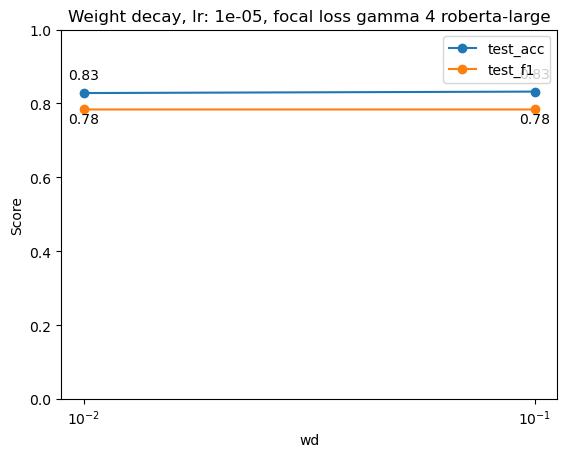

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Weight decay, lr: {lr}, focal loss gamma {g} {model_checkpoint}',
                        column='wd',
                        sci_format=True)

In [6]:
%reset -f